In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [109]:
df = pd.read_csv("./salary.csv")
df.head(), df.shape

(   YearsExperience  Salary
 0                0    6.50
 1                2    8.06
 2                4   12.25
 3                6   17.72
 4                8   21.77,
 (16, 2))

In [110]:
X = df.YearsExperience
y = df.Salary
X.shape

(16,)

Text(0.5, 0, 'Years of Experience')

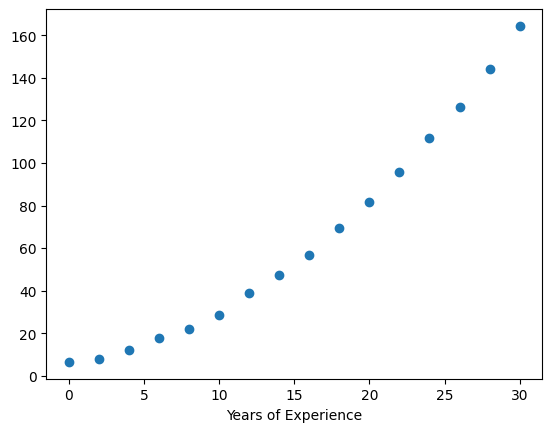

In [111]:
plt.scatter(df["YearsExperience"], df["Salary"])
plt.xlabel("Years of Experience")

In [112]:
def r2score(y_true, y_pred):
    """
    Calculate the R^2 score
    """
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

In [113]:
class LinearRegression:
    def __init__(self, X, y, learning_rate=0.01, epochs=1000):
        self.X = X
        self.y = y
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.num_samples = X.shape[0]

        self.theta = np.random.rand(X.shape[1])
        self.loss = []

    def compute_loss(self, y_pred, y):
        return np.mean((y_pred - y) ** 2)

    def predict(self, X):
        return np.dot(X, self.theta)

    def fit(self):
        for epoch in range(self.epochs):
            y_pred = self.predict(self.X)
            loss = self.compute_loss(y_pred, self.y)
            self.loss.append(loss)
            gradient = self.X.T.dot(y_pred - self.y) / self.num_samples
            self.theta -= self.learning_rate * gradient
            print(f"Epoch {epoch}/{self.epochs}, Loss: {loss:.4f}")

        return {"weight": self.theta, "loss": self.loss[-1]}

In [114]:
X_linear = X.values.reshape(-1, 1)
X_linear[:5]

array([[0],
       [2],
       [4],
       [6],
       [8]])

In [115]:
X_linear = np.c_[np.ones(X_linear.shape[0]), X_linear]  # Thêm cột bias
X_linear[:5]

array([[1., 0.],
       [1., 2.],
       [1., 4.],
       [1., 6.],
       [1., 8.]])

In [116]:
linear_model = LinearRegression(
    X_linear,
    y,
    learning_rate=0.001,
    epochs=50,
)
linear_model.fit()

Epoch 0/50, Loss: 5982.9501
Epoch 1/50, Loss: 2938.5812
Epoch 2/50, Loss: 1492.1903
Epoch 3/50, Loss: 804.9955
Epoch 4/50, Loss: 478.4933
Epoch 5/50, Loss: 323.3555
Epoch 6/50, Loss: 249.6325
Epoch 7/50, Loss: 214.5896
Epoch 8/50, Loss: 197.9236
Epoch 9/50, Loss: 189.9883
Epoch 10/50, Loss: 186.2010
Epoch 11/50, Loss: 184.3845
Epoch 12/50, Loss: 183.5042
Epoch 13/50, Loss: 183.0688
Epoch 14/50, Loss: 182.8447
Epoch 15/50, Loss: 182.7211
Epoch 16/50, Loss: 182.6452
Epoch 17/50, Loss: 182.5919
Epoch 18/50, Loss: 182.5494
Epoch 19/50, Loss: 182.5121
Epoch 20/50, Loss: 182.4772
Epoch 21/50, Loss: 182.4435
Epoch 22/50, Loss: 182.4104
Epoch 23/50, Loss: 182.3775
Epoch 24/50, Loss: 182.3448
Epoch 25/50, Loss: 182.3122
Epoch 26/50, Loss: 182.2796
Epoch 27/50, Loss: 182.2470
Epoch 28/50, Loss: 182.2145
Epoch 29/50, Loss: 182.1819
Epoch 30/50, Loss: 182.1494
Epoch 31/50, Loss: 182.1170
Epoch 32/50, Loss: 182.0845
Epoch 33/50, Loss: 182.0520
Epoch 34/50, Loss: 182.0196
Epoch 35/50, Loss: 181.9872

{'weight': array([0.53031355, 4.5299319 ]),
 'loss': np.float64(181.53528951737798)}

In [117]:
Y_pred = linear_model.predict(X_linear)
linear_score = r2score(Y_pred, y)
print(f"R^2 score: {linear_score:.4f}")

R^2 score: 0.8959


In [118]:
def create_polynomial_features(X, degree=2):
    """
    Create polynomial features for the input data
    """
    X_new = X
    for d in range(2, degree + 1):
        X_new = np.c_[X_new, X**d]
    return X_new

In [119]:
X_poly = create_polynomial_features(X, degree=2)
X_poly[:5]

array([[ 0,  0],
       [ 2,  4],
       [ 4, 16],
       [ 6, 36],
       [ 8, 64]])

In [120]:
X_poly = np.c_[np.ones(X_poly.shape[0]), X_poly]  # Thêm cột bias
X_poly[:5]

array([[ 1.,  0.,  0.],
       [ 1.,  2.,  4.],
       [ 1.,  4., 16.],
       [ 1.,  6., 36.],
       [ 1.,  8., 64.]])

In [121]:
poly_model = LinearRegression(
    X_poly,
    y,
    learning_rate=0.00001,
    epochs=50,
)
poly_model.fit()

Epoch 0/50, Loss: 4416.0102
Epoch 1/50, Loss: 2745.7921
Epoch 2/50, Loss: 1713.8455
Epoch 3/50, Loss: 1076.2536
Epoch 4/50, Loss: 682.3128
Epoch 5/50, Loss: 438.9113
Epoch 6/50, Loss: 288.5203
Epoch 7/50, Loss: 195.5955
Epoch 8/50, Loss: 138.1761
Epoch 9/50, Loss: 102.6937
Epoch 10/50, Loss: 80.7650
Epoch 11/50, Loss: 67.2105
Epoch 12/50, Loss: 58.8298
Epoch 13/50, Loss: 53.6459
Epoch 14/50, Loss: 50.4371
Epoch 15/50, Loss: 48.4485
Epoch 16/50, Loss: 47.2139
Epoch 17/50, Loss: 46.4452
Epoch 18/50, Loss: 45.9643
Epoch 19/50, Loss: 45.6612
Epoch 20/50, Loss: 45.4679
Epoch 21/50, Loss: 45.3426
Epoch 22/50, Loss: 45.2592
Epoch 23/50, Loss: 45.2018
Epoch 24/50, Loss: 45.1603
Epoch 25/50, Loss: 45.1288
Epoch 26/50, Loss: 45.1033
Epoch 27/50, Loss: 45.0817
Epoch 28/50, Loss: 45.0624
Epoch 29/50, Loss: 45.0445
Epoch 30/50, Loss: 45.0275
Epoch 31/50, Loss: 45.0111
Epoch 32/50, Loss: 44.9950
Epoch 33/50, Loss: 44.9792
Epoch 34/50, Loss: 44.9635
Epoch 35/50, Loss: 44.9478
Epoch 36/50, Loss: 44.93

{'weight': array([0.30878137, 0.20817533, 0.18276029]),
 'loss': np.float64(44.731279572107326)}

In [122]:
y_pred_poly = poly_model.predict(X_poly)
poly_score = r2score(y_pred_poly, y)
print(f"linear R^2 score: {linear_score:.4f}")
print(f"polynomial R^2 score: {poly_score:.4f}")
print(f"linear last loss: {linear_model.loss[-1]:.4f}")
print(f"polynomial last loss: {poly_model.loss[-1]:.4f}")

linear R^2 score: 0.8959
polynomial R^2 score: 0.9848
linear last loss: 181.5353
polynomial last loss: 44.7313


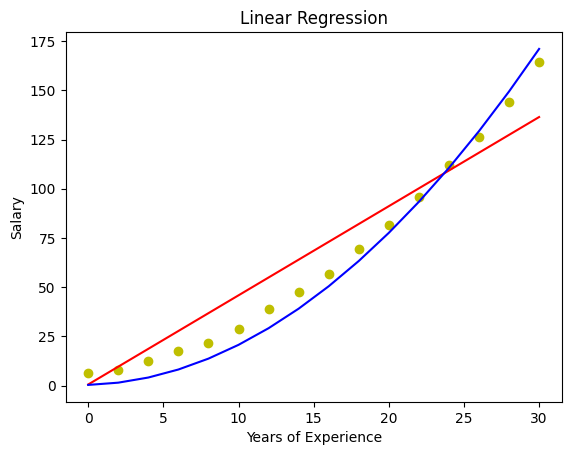

In [123]:
plt.plot(
    X,
    y,
    "yo",
    X,
    linear_model.predict(X_linear),
    "r-",
    X,
    poly_model.predict(X_poly),
    "b-",
)
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Linear Regression")
plt.show()